In [1]:
import json
import pandas as pd

with open("paper_crosslinks_nsp8.json", "r", encoding = "utf-8") as f:
    paper_crosslinks_nsp8 = set(json.load(f)["crosslinks"])
    f.close()
    
with open("paper_crosslinks_all.json", "r", encoding = "utf-8") as f:
    paper_crosslinks_all = set(json.load(f)["crosslinks"])
    f.close()
    
with open("annika_crosslinks_nsp8.json", "r", encoding = "utf-8") as f:
    annika_crosslinks_nsp8 = set(json.load(f)["crosslinks"])
    f.close()
    
with open("annika_crosslinks_all.json", "r", encoding = "utf-8") as f:
    annika_crosslinks_all = set(json.load(f)["crosslinks"])
    f.close()

In [2]:
print(len(paper_crosslinks_nsp8), len(paper_crosslinks_all), len(annika_crosslinks_nsp8), len(annika_crosslinks_all))

21 36 22 25


In [3]:
annika_crosslinks_nsp8 - paper_crosslinks_nsp8 #9

{'AKVTSAMQTMLFTMLR2-ANSAVKLQ6',
 'ANSAVKLQ6-DGCVPLNIIPLTTAAKLMVVIPDYNTYK16',
 'ANSAVKLQ6-KLDNDALNNIINNAR1',
 'ANSAVKLQ6-KLEKMADQAMTQMYK1',
 'ANSAVKLQ6-KLEKMADQAMTQMYK4',
 'ANSAVKLQ6-SLNVAKSEFDRDAAMQR6',
 'KLDNDALNNIINNAR1-KLDNDALNNIINNAR1',
 'KLDNDALNNIINNAR1-KSLNVAK1',
 'KLDNDALNNIINNAR1-SEDKR4'}

In [4]:
annika_crosslinks_all - paper_crosslinks_all #11

{'AKVTSAMQTMLFTMLR2-ANSAVKLQ6',
 'AKVTSAMQTMLFTMLR2-DGCVPLNIIPLTTAAKLMVVIPDYNTYK16',
 'AKVTSAMQTMLFTMLR2-KSLNVAK1',
 'ANSAVKLQ6-DGCVPLNIIPLTTAAKLMVVIPDYNTYK16',
 'ANSAVKLQ6-KLDNDALNNIINNAR1',
 'ANSAVKLQ6-KLEKMADQAMTQMYK1',
 'ANSAVKLQ6-KLEKMADQAMTQMYK4',
 'ANSAVKLQ6-MADQAMTQMYKQAR11',
 'ANSAVKLQ6-SLNVAKSEFDRDAAMQR6',
 'KLDNDALNNIINNAR1-KLDNDALNNIINNAR1',
 'KLDNDALNNIINNAR1-KSLNVAK1'}

In [5]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

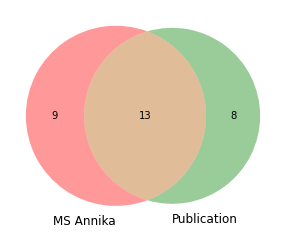

In [6]:
venn2(subsets = (len(annika_crosslinks_nsp8 - paper_crosslinks_nsp8), len(paper_crosslinks_nsp8 - annika_crosslinks_nsp8), len(annika_crosslinks_nsp8 & paper_crosslinks_nsp8)), 
      set_labels = ("MS Annika", "Publication"))

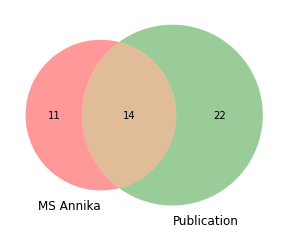

In [7]:
venn2(subsets = (len(annika_crosslinks_all - paper_crosslinks_all), len(paper_crosslinks_all - annika_crosslinks_all), len(annika_crosslinks_all & paper_crosslinks_all)), 
      set_labels = ("MS Annika", "Publication"))

In [8]:
def construct_sequences_from_xls(crosslink):
    valid_AA = ["G", "P", "A", "V", "L", "I", "M", "C", "F", "Y", "W", "H", "K", "R", "Q", "N", "E", "D", "S", "T"]
    peptides = crosslink.split("-")
    peptide_a = "".join([AA for AA in peptides[0] if AA in valid_AA])
    peptide_b = "".join([AA for AA in peptides[1] if AA in valid_AA])
    xl_pos_a = int("".join([AA for AA in peptides[0] if AA not in valid_AA]))
    xl_pos_b = int("".join([AA for AA in peptides[1] if AA not in valid_AA]))
    return [peptide_a[:xl_pos_a-1] + "[" + peptide_a[xl_pos_a-1] + "]" + peptide_a[xl_pos_a:],
            peptide_b[:xl_pos_b-1] + "[" + peptide_b[xl_pos_b-1] + "]" + peptide_b[xl_pos_b:]]

In [9]:
Sequence_A = []
Sequence_B = []
for xl in annika_crosslinks_nsp8 - paper_crosslinks_nsp8:
    seqs = construct_sequences_from_xls(xl)
    Sequence_A.append(seqs[0])
    Sequence_B.append(seqs[1])
    
unique_links_nsp8 = pd.DataFrame({"Sequence A": Sequence_A, "Sequence B": Sequence_B})
unique_links_nsp8.to_excel("unique_links_nsp8.xlsx")

In [10]:
Sequence_A = []
Sequence_B = []
for xl in annika_crosslinks_all - paper_crosslinks_all:
    seqs = construct_sequences_from_xls(xl)
    Sequence_A.append(seqs[0])
    Sequence_B.append(seqs[1])
    
unique_links_all = pd.DataFrame({"Sequence A": Sequence_A, "Sequence B": Sequence_B})
unique_links_all.to_excel("unique_links_all.xlsx")